In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

from enso.data import read_noaa

In [3]:
data_dir = "./data/nino34"
fig_dir = "./figures/20230710_nino34"
res_dir = "./results"

saveifg = False

In [4]:
fname = f"{data_dir}/noaa_nino34_anomaly.txt"

df = read_noaa(fname)
flatten = df.melt(id_vars="year")

In [5]:
q = (
    df.lazy()
    .melt(id_vars="year")
    .select(
        pl.date(pl.col("year"), pl.col("variable"), 1).alias("date"),
        pl.col("value").alias("nino34")
    )
    .sort(by="date")
    .drop_nulls()
)

tseries = q.collect()

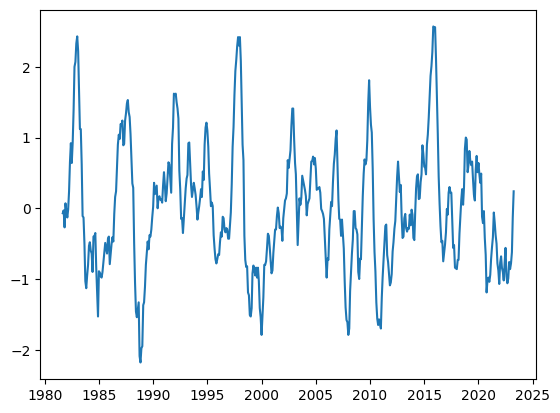

In [6]:
fig, ax = plt.subplots()

ax.plot(tseries["date"][-500:], tseries["nino34"][-500:])
plt.show()
